In [10]:
import numpy as np
import math
import pandas as pd


# Time
import datetime as dt
from pandas.tseries.frequencies import to_offset

# Extracting info from Yahoo
from pandas_datareader import data as pdr
import pandas_datareader as data
import yfinance as yf

# Plotting
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px #Dividends chart
from ipyvizzu import Chart, Data, Config, Style

# Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error,accuracy_score

## INVESTMENT ADVISER
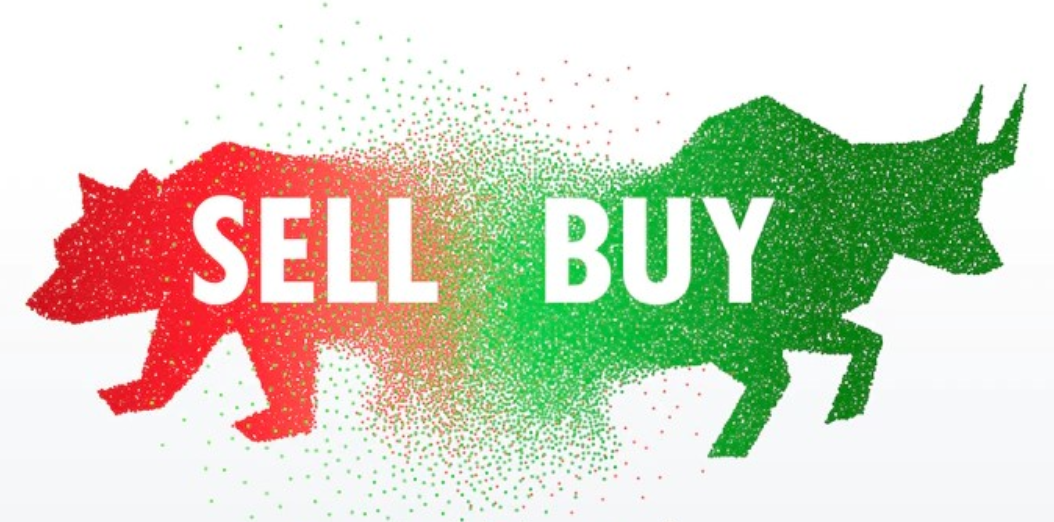


## Moving averages method
Implementation based on the Mark Minervini Trend Template. Author had found that these conditions indicates that the stock is ready to potentially be bought and go on a massive run. It could be a good start point for trading.

Program evaluates and compares 52 week Low and High prices as well. 

In [11]:
yf.pdr_override()

start = dt.datetime(2020,12,1)
now = dt.datetime(2022,6,4)
# now = dt.datetime.now()

In [12]:
exportList= pd.DataFrame(columns=['Stock', "50 Day MA", "150 Day Ma", "200 Day MA", "52 Week Low", "52 week High"]) # "RS_Rating",

In [13]:

all_stocks = [
	'AXP','AAPL','BA','CAT','CSCO','CVX','XOM','GS','HD','IBM','INTC','JNJ','KO', 
	'SIDU', 'BYND', 'GOLD', 'HOOD', 'EVOK', 'SPOT', 'OKE', 'WWE', 'SRNE', 'ROKU', 'ACAD', 'SNAP', 'DYN', 'OLN', 
	'CVNA', 'TWTR', 'MULN', 'AERC', 'CHWY', 'PINS', 'AMZN', 'AMC', 'AMAT', 'GOOG', 'NIO', 'LI', 'SQ', 'TSM', 'BAC',
	'T', 'ARCT', 'GME', 'TSLA', 'INTC', 'PBR', 'PLTR', 'RBLX', 'KGC', 'ABEV', 'NOK', 'AAL', 'BBD', 'SNAP', 'NVDA', 
	'NLY', 'SOFI', 'ITUB', 'CCL', 'F', 'AMD', 'DIDI', 'AAL', 'OXY', 'NLY', 'ET', 'DBRG', 'VALE', 'DBRG', 'KMI', 'UBER', 'SNAP',
	'GGB', 'DNA', 'BEKE', 'VZ', 'PCG', 'CVX', 'MBY', 'KO', 'SAN', 'ABEV', 'MRK', 'ENIA', 'SLB', 'JPM', 'TSLA', 'MO',
	'SIRI', 'NCLH', 'FCX', 'LUMN', 'CSX', 'JD', 'GOLD', 'PLUG', 'RIG', 'BKR', 'DAL', 'RBLX', 'GRAB', 'AUY', 'MPC', 'TELL', 'CTRA'
]

# Remove dublicates from list
all_stocks = list( dict.fromkeys(all_stocks))

# Count Tickers
print(f'Tickers checked: {len(all_stocks)}')
all_stocks = pd.DataFrame(all_stocks)
all_stocks.columns = ['Symbol']


for i in all_stocks.index:
	stock=str(all_stocks["Symbol"][i])

	try:
		df = pdr.get_data_yahoo(stock, start, now)

		SMAused=[50,150,200]
		for x in SMAused:
			sma=x
			df["SMA_"+str(sma)]=round(df.iloc[:,4].rolling(window=sma).mean(),2)


		currentClose=df["Adj Close"][-1]
		moving_average_50=df["SMA_50"][-1]
		moving_average_150=df["SMA_150"][-1]
		moving_average_200=df["SMA_200"][-1]
		low_of_52week=min(df["Adj Close"][-260:])
		high_of_52week=max(df["Adj Close"][-260:])
		try:
			moving_average_200_20 = df["SMA_200"][-20]

		except Exception:
			moving_average_200_20=0

		#Condition 1: Current Price > 150 SMA and > 200 SMA
		if(currentClose>moving_average_150>moving_average_200):
			cond_1=True
		else:
			cond_1=False
		#Condition 2: 150 SMA and > 200 SMA
		if(moving_average_150>moving_average_200):
			cond_2=True
		else:
			cond_2=False
		#Condition 3: 200 SMA trending up for at least 1 month (ideally 4-5 months)
		if(moving_average_200>moving_average_200_20):
			cond_3=True
		else:
			cond_3=False
		#Condition 4: 50 SMA> 150 SMA and 50 SMA> 200 SMA
		if(moving_average_50>moving_average_150>moving_average_200):
			#print("Condition 4 met")
			cond_4=True
		else:
			#print("Condition 4 not met")
			cond_4=False
		#Condition 5: Current Price > 50 SMA
		if(currentClose>moving_average_50):
			cond_5=True
		else:
			cond_5=False
		#Condition 6: Current Price is at least 30% above 52 week low (Many of the best are up 100-300% before coming out of consolidation)
		if(currentClose>=(1.3*low_of_52week)):
			cond_6=True
		else:
			cond_6=False
		#Condition 7: Current Price is within 25% of 52 week high
		if(currentClose>=(.75*high_of_52week)):
			cond_7=True
		else:
			cond_7=False
		
		if(cond_1 and cond_2 and cond_3 and cond_4 and cond_5 and cond_6 and cond_7):
			exportList = exportList.append({'Stock': stock,  "50 Day MA": moving_average_50, "150 Day Ma": moving_average_150, "200 Day MA": moving_average_200, "52 Week Low": low_of_52week, "52 week High": high_of_52week}, ignore_index=True) #"RS_Rating": RS_Rating,  and cond_8
	except Exception:
		print("No data on "+stock)

Tickers checked: 95
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*************

In [14]:
print(f'Tickers checked: {len(all_stocks)}')
print()
print("Recomendations for buying:")
print()
print(exportList)

Tickers checked: 95

Recomendations for buying:

   Stock  50 Day MA  150 Day Ma  200 Day MA  52 Week Low  52 week High
0    CVX     166.38      140.56      130.26    91.491524    178.279999
1    XOM      87.66       75.49       70.69    50.938484     99.089996
2    OKE      67.08       63.01       61.08    47.143963     72.591393
3    WWE      61.14       55.87       55.67    46.839497     67.173523
4    OLN      58.65       55.37       53.79    40.311237     66.919998
5    PBR      13.05       10.96       10.18     6.629016     14.800000
6   ITUB       5.25        4.64        4.57     3.593598      5.851902
7    OXY      60.96       45.20       41.08    21.840624     70.726555
8     ET      11.21        9.78        9.61     7.875857     12.010000
9    KMI      18.98       17.32       17.01    14.782840     20.020000
10   GGB       5.84        5.21        5.04     4.023648      6.373935
11   PCG      12.22       12.03       11.53     8.290000     13.030000
12   SLB      41.93       37

### We chose one company to show an example.

In [15]:
stock = exportList['Stock'][1]
print(stock)

XOM


In [16]:
# exportList.to_excel(r"C:\Users\simon\Downloads\screened2.xlsx")

In [17]:
# Choosing a period which we want to analyze for training and validating
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2022, 6, 1)
# end = dt.date.today()

# BA boeing company, data from Yahoo finanse
stock_d = data.DataReader(stock, 'yahoo', start, end)

# week opening
def week_open(array_like):
    return array_like[0]

# week closing
def week_close(array_like):
    return array_like[-1]

# Aplied logic: that opening day is Monday, Closing day is Friday
logic = {
                        # Open - first day (Monday) opening value
                        'Open': week_open, 
                        # High - max value of the period
                         'High': 'max',
                        # Low - min value of the period
                         'Low': 'min',
                        #  Close - last day closing value (Friday)
                         'Close': week_close,
                         #  Adj Close - last day closing value (Friday)
                         'Adj Close': week_close,
                        #  Volume - sum of period Volume values
                         'Volume': 'sum'}

# Converting daily data to weekly with aplied logic
stock_w = stock_d.resample('W').apply(logic) 
stock_w.index -= to_offset('6D')

df1 = stock_d[['Open', 'High', 'Low',  'Close', 'Adj Close', 'Volume']].reset_index()
dfw = stock_w[['Open', 'High', 'Low',  'Close', 'Adj Close', 'Volume']].reset_index()
df = stock_d[['Open', 'High', 'Low',  'Close', 'Volume', 'Adj Close']] 

In [18]:
print('Last days stock prices:')
print(df.tail(5))

Last days stock prices:
                 Open       High        Low      Close      Volume  Adj Close
Date                                                                         
2022-05-25  94.580002  96.529999  94.470001  96.300003  29947800.0  96.300003
2022-05-26  96.599998  97.430000  96.199997  96.639999  24314800.0  96.639999
2022-05-27  95.949997  97.930000  95.300003  97.589996  25588800.0  97.589996
2022-05-31  98.559998  99.779999  95.709999  96.000000  44888100.0  96.000000
2022-06-01  97.019997  98.709999  96.620003  97.839996  25815400.0  97.839996


## Let's explore the company!
#### Exxon Mobil Corporation (XOM)

Sector(s): Energy
Industry: Oil & Gas Integrated
Full Time Employees: 63,000

In [19]:
chart = Chart(display="manual")

data_ch = Data()

df1 = df1[df1["Date"] > "2018-01-01"]

data_ch.add_data_frame(df1)

chart.animate(data_ch)
chart.scroll_into_view = True

chart.animate(Config({
    "geometry": "rectangle"
}))
chart.animate(Config({"title": "Volume 2016-2022"}))
chart.animate(Config({"x": "Date", "y": "Volume"}))
chart.animate(Config({"title": "Close Price 2016-2022"}))
chart.animate(Config({"x": "Date", "y": "Close"}))

chart.animate(Config({
    "geometry": "line"
}))

chart.feature("tooltip", True)

chart.animate(Style({"title": {"fontSize": 25}}))
chart

In [20]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df1['Date'], y=df1['Close'], name="Close"),
    secondary_y=True,
)
fig.add_trace(
    go.Bar(x=df1['Date'], y=df1['Volume'], name="Volume"),
    secondary_y=False,
)
# Add figure title
fig.update_layout(
    title_text=f"{stock} Close prices and Volume"
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="Volume", secondary_y=False)
fig.update_yaxes(title_text="Close Price", secondary_y=True)

fig.show()

In [21]:
df1['SMA50'] = df1.Close.rolling(50).mean()
df1['SMA150'] = df1.Close.rolling(150).mean()
df1['SMA200'] = df1.Close.rolling(200).mean()

fig = go.Figure(data=[
            go.Scatter(x=df1.Date, y=df1.SMA50, line=dict(color='orange', width=1), name="SMA50"),
            go.Scatter(x=df1.Date, y=df1.SMA150, line=dict(color='green', width=1), name="SMA150"),
            go.Scatter(x=df1.Date, y=df1.SMA200, line=dict(color='blue', width=1), name="SMA200")])

# Add figure title
fig.update_layout(
    title_text=f"{stock} 50 day, 150 day and 200day moving averages"
)
fig.show()

#### Financial chart below describes open, high, low and close prices for a given date. The boxes represent the spread between the open and close values and the lines represent the spread between the low and high values.

In [22]:
# date_range = df1[df1["Date"] > "2018-01-01"]

fig = go.Figure(data=[go.Candlestick(x=df1['Date'], 
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])
                ])
fig.update_layout(
    title=f'{stock} Stock Price Daily Data',
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(
    title_text = 'Date',
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(count = 2, label = '2y', step = 'year', stepmode = 'backward'),
            dict(count = 5, label = '5y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))
fig.show()

In [23]:
fig = go.Figure(data=[go.Candlestick(x=dfw['Date'], 
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])
                ])
fig.update_layout(
    title=f'{stock} Stock Price Weekly Data'
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(
    title_text = 'Date',
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(count = 2, label = '2y', step = 'year', stepmode = 'backward'),
            dict(count = 5, label = '5y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))
# fig.add_hline(y=40)
fig.show()

In [24]:
dates = [
         dt.datetime(year=2021, month=7, day=17),
         dt.datetime(year=2021, month=8, day=17),
         dt.datetime(year=2021, month=9, day=17),
         dt.datetime(year=2021, month=10, day=17),
         dt.datetime(year=2021, month=11, day=17),
         dt.datetime(year=2021, month=12, day=17),
         dt.datetime(year=2022, month=1, day=17),
         dt.datetime(year=2022, month=2, day=17),
         dt.datetime(year=2022, month=3, day=17),
         dt.datetime(year=2022, month=4, day=17),
         dt.datetime(year=2022, month=5, day=17),
         dt.datetime(year=2022, month=6, day=17)
         ]

fig = go.Figure(data=[go.Candlestick(x=dates,
                       open=df1.Open, high=df1.High,
                       low=df1.Low, close=df1.Close)])
fig.update_layout(
    title=f'{stock} Stock Price Monthly Data',
)

fig.show()

## Finacial analysis

In [25]:
# Get information
sec = yf.Ticker("XOM")

## Earnings

In [26]:
earnings = pd.DataFrame(sec.earnings)

trace1 = go.Bar(
    x = earnings.index,
    y = earnings['Revenue'],
    name='Revenue',
    marker=dict(color='rgba(16, 112, 2, 0.8)',
                line=dict(color='rgb(0,0,0)', width=1)),     )

trace2 = go.Bar(
    x = earnings.index,
    y = earnings['Earnings'],
    name='Earnings',
    marker=dict(color='rgba(80, 26, 80, 0.8)',
                line=dict(color='rgb(0,0,0)', width=1)),     )

data_ch = [trace1, trace2]
layout = dict(
    title='Earnings 2018-2021',
    xaxis=dict( 
        ticks='outside', ticklen=5,
        zeroline=True, linewidth=1, linecolor='black'
        ) )

    
fig = go.Figure(data=data_ch, layout=layout)            
py.iplot(fig)

## Financials

In [27]:
financials = pd.DataFrame(sec.financials)

con_fin =financials.transpose()
convert_fin = con_fin.sort_index(ascending=True)


trace1 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_fin['Net Income'],
    mode='lines+markers',
    name='Net Income',
    marker=dict(color='rgba(16, 112, 2, 0.8)'),
)
trace2 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_fin['Ebit'],
    mode='lines+markers',
    name='Ebit',
    marker=dict(color='rgba(80, 26, 80, 0.8)'),
)
trace3 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_fin['Gross Profit'],
    mode='lines+markers',
    name='Gross Profit',
    marker=dict(color='rgba(247, 43, 163, 0.8)'),
)
data_ch = [trace1, trace2, trace3]
layout = dict(
    title='Financials 2018-2021',
    xaxis=dict( 
        ticks='outside', ticklen=5, 
        zeroline=True, linewidth=1, linecolor='black'
        ))
fig = dict(data=data_ch, layout=layout)            
py.iplot(fig)

## Balance

In [28]:
# extracting balance info from Yahoo Finanse
balance = pd.DataFrame(sec.balancesheet)

# transposing and sorting data
con_balance = balance.transpose()
convert_balance = con_balance.sort_index(ascending=True)

# Total Current Liabilities, Cash, Total Assets
trace1 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_balance['Total Current Liabilities'],
    mode='lines+markers',
    name='Total Current Liabilities',
    marker=dict(color='rgba(16, 112, 2, 0.8)'),
)
trace2 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_balance['Cash'],
    mode='lines+markers',
    name='Cash',
    marker=dict(color='rgba(80, 26, 80, 0.8)'),
)
trace3 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_balance['Total Assets'],
    mode='lines+markers',
    name='Total Assets',
    marker=dict(color='rgba(225, 103, 17, 0.53)'),
)
data_ch = [trace1, trace2, trace3]
layout = dict(
    title='Balance 2018-2021',
    xaxis=dict( 
        ticks='outside', ticklen=5, 
        zeroline=True, linewidth=1, linecolor='black'
        ))
fig = dict(data=data_ch, layout=layout)            
py.iplot(fig)

In [29]:
convert_balance

Total Liab  Total Stockholder Equity  Minority Interest  \
                                                                        
2018-12-31  1.476680e+11              1.917940e+11       6.734000e+09   
2019-12-31  1.636590e+11              1.916500e+11       7.288000e+09   
2020-12-31  1.686200e+11              1.571500e+11       6.980000e+09   
2021-12-31  1.632400e+11              1.685770e+11       7.106000e+09   

            Other Current Liab  Total Assets  Common Stock  \
                                                             
2018-12-31        1.553700e+10  3.461960e+11  1.525800e+10   
2019-12-31        1.419000e+10  3.625970e+11  1.563700e+10   
2020-12-31        1.382600e+10  3.327500e+11  1.568800e+10   
2021-12-31        2.047700e+10  3.389230e+11  1.574600e+10   

            Other Current Assets  Retained Earnings    Other Liab  \
                                                                    
2018-12-31          1.272000e+09       4.216530e+11  6.999200e+10   
2019-12-31          1.469000e+09       4.213410e+11  6.870700e+10   
2020-12-31          1.098000e+09       3.839430e+11  6.094600e+10   
2021-12-31          1.189000e+09       3.920590e+11  5.921500e+10   

            Treasury Stock  ...  Short Long Term Debt  \
                            ...                         
2018-12-31   -2.451170e+11  ...          4.070000e+09   
2019-12-31   -2.453280e+11  ...          1.617000e+09   
2020-12-31   -2.424810e+11  ...          2.828000e+09   
2021-12-31   -2.392280e+11  ...          2.281000e+09   

            Other Stockholder Equity  Property Plant Equipment  \
                                                                 
2018-12-31             -1.956400e+10              2.471010e+11   
2019-12-31             -1.949300e+10              2.596510e+11   
2020-12-31             -1.670500e+10              2.336310e+11   
2021-12-31             -1.376400e+10              2.226340e+11   

            Total Current Assets  Long Term Investments  Net Tangible Assets  \
                                                                               
2018-12-31          4.797300e+10           2.659200e+10         1.917940e+11   
2019-12-31          5.005200e+10           2.948100e+10         1.916500e+11   
2020-12-31          4.489300e+10           2.991500e+10         1.571500e+11   
2021-12-31          5.915400e+10           3.136300e+10         1.685770e+11   

            Net Receivables  Long Term Debt     Inventory  Accounts Payable  
                                                                             
2018-12-31     2.470100e+10    1.923500e+10  1.895800e+10      2.106300e+10  
2019-12-31     2.696600e+10    2.467200e+10  1.852800e+10      2.469400e+10  
2020-12-31     2.058100e+10    4.550200e+10  1.885000e+10      1.749900e+10  
2021-12-31     3.238300e+10    4.166700e+10  1.878000e+10      2.662300e+10  

[4 rows x 24 columns]

In [30]:
trace1 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_balance['Long Term Debt'],
    mode='lines+markers',
    name='Long Term Debt',
    marker=dict(color='rgba(16, 112, 2, 0.8)'),
)
trace2 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_balance['Inventory'],
    mode='lines+markers',
    name='Inventory',
    marker=dict(color='rgba(80, 26, 80, 0.8)'),
)
trace3 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_balance['Accounts Payable'],
    mode='lines+markers',
    name='Accounts Payable',
    marker=dict(color='rgba(225, 103, 17, 0.53)'),
)
trace4 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_balance['Net Receivables'],
    mode='lines+markers',
    name='Net Receivables',
    marker=dict(color='rgba(247, 43, 163, 0.8)'),
)
data_ch = [trace1, trace2, trace3, trace4]
layout = dict(
    title='Balance 2018-2021',
    xaxis=dict( 
        ticks='outside', ticklen=5, 
        zeroline=True, linewidth=1, linecolor='black'
        ))
fig = dict(data=data_ch, layout=layout)            
py.iplot(fig)

## Cashflow

In [31]:
cashflow = pd.DataFrame(sec.cashflow)

cf = cashflow.transpose()
cf = cf.sort_index(ascending=True)
cf = cf.reset_index()

cf.columns = ['Date',
 'Investments',
 'Change To Liabilities',
 'Total Cashflows From Investing Activities',
 'Net Borrowings',
 'Total Cash From Financing Activities',
 'Change To Operating Activities',
 'Net Income',
 'Change In Cash',
 'Repurchase Of Stock',
 'Effect Of Exchange Rate',
 'Total Cash From Operating Activities',
 'Depreciation',
 'Other Cashflows From Investing Activities',
 'Dividends Paid',
 'Change To Inventory',
 'Change To Account Receivables',
 'Other Cashflows From Financing Activities',
 'Change To Netincome',
 'Capital Expenditures']

In [32]:
# Animated chart

data_ch = Data()
data_ch.add_data_frame(cf)
chart = Chart(display="manual")
chart.scroll_into_view = True
chart.animate(data_ch)

chart.animate(Config({"title": "Repurchase Of Stock"}))
chart.animate(Config({"x": "Date", "y": ["Repurchase Of Stock"]}))
chart.animate(Config({"title": "Net Income 2018-2021"}))
chart.animate(Config({"x": "Date", "y": ["Net Income"], "color": "Net Income"}))
# chart.animate(Config({"x": "Date", "y": ["Dividends Paid"]}))
# chart.animate(Config({"x": "Date", "y": ["Net Income"], "color": "Net Income"}))

# chart.animate(Config({"geometry": "area"}))

chart.feature("tooltip", True)

chart

In [33]:
# Animated chart

data_ch = Data()
data_ch.add_data_frame(cf)
chart = Chart(display="manual")
chart.animate(data_ch)

chart.animate(Config({"title": "Dividends Paid"}))
chart.animate(Config({"x": "Date", "y": ["Dividends Paid"]}))
chart.animate(Config({"title": "Net Income"}))
chart.animate(Config({"x": "Date", "y": ["Net Income"], "color": "Net Income"}))

chart.animate(Config({"geometry": "area"}))

chart.feature("tooltip", True)

chart

## Dividends

We decided not to show quarterly dividends and to show average dividends rate per year instead. The purpose of this decission is to have a clear view of a trend.

In [34]:
dividends = pd.DataFrame(sec.dividends)
dividends = dividends.reset_index()
# dividends = dividends[dividends["Date"] > "2000-01-01"]
dividends['Year'] = dividends['Date'].dt.year
div = dividends.groupby(by=["Year"]).mean()
div = div.reset_index()
# display(div)

fig = px.bar(div, x='Year', y='Dividends',
            color='Year',
         
             height=400)
fig.show()

## Institutional holders

In [35]:
institutional_holders = pd.DataFrame(sec.institutional_holders)

trace1 = go.Pie(
    values=institutional_holders['Value'],
    labels=institutional_holders['Holder'], 
    hole=0.5 )

data_ch = [trace1]
layout = dict(
    title='Institutional holders',
    uniformtext_minsize=12,
    uniformtext_mode='hide'
    )
fig = go.Figure(data=data_ch)
fig.update_traces(textposition='inside')
fig.update_layout(layout)
  
fig.show()

## Bidirectional LSTM model
Allows the LSTM model to learn the input sequence both forward and backwards and concatenate both interpretations.

In [36]:
#Create a new dataframe with only the 'Close' column
prices = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = prices.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * 0.8 )

training_data_len

4512

In [37]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.11990622],
       [0.10978613],
       [0.13803805],
       ...,
       [0.90837942],
       [0.88692487],
       [0.91175278]])

In [38]:
#Create the training data set 
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
#We create a loop
for i in range(360, len(train_data)):
  x_train.append(train_data[i-60:i, 0]) #Will conaint 60 values (0-59)
  y_train.append(train_data[i, 0]) #Will contain the 61th value (60)
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

In [39]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4152, 60, 1)

In [40]:
model = Sequential()
model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True),  input_shape=(x_train.shape[1], 1)))
model.add(Dense(32, activation='relu'))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [41]:
model_path = 'LSTM_multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='min') #,  
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True,  verbose=0, mode='min') #mode='min',
callbacks=[early_stopings,checkpoint] 

In [42]:
#Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, steps_per_epoch=100, validation_split=0.05, verbose=1, callbacks=callbacks) #steps_per_epoch=100

Epoch 1/20
100/100 [==============================] - 17s 105ms/step - loss: 0.0284 - val_loss: 9.6282e-04
Epoch 2/20
100/100 [==============================] - 9s 95ms/step - loss: 0.0013 - val_loss: 4.7690e-04
Epoch 3/20
100/100 [==============================] - 9s 87ms/step - loss: 9.6829e-04 - val_loss: 3.5649e-04
Epoch 4/20
100/100 [==============================] - 8s 85ms/step - loss: 6.6188e-04 - val_loss: 3.1892e-04
Epoch 5/20
100/100 [==============================] - 9s 87ms/step - loss: 5.5945e-04 - val_loss: 1.7586e-04
Epoch 6/20
100/100 [==============================] - 9s 85ms/step - loss: 5.0039e-04 - val_loss: 1.4542e-04
Epoch 7/20
100/100 [==============================] - 8s 83ms/step - loss: 4.5102e-04 - val_loss: 1.6137e-04
Epoch 8/20
100/100 [==============================] - 8s 80ms/step - loss: 4.3902e-04 - val_loss: 2.4158e-04
Epoch 9/20
100/100 [==============================] - 8s 84ms/step - loss: 4.6428e-04 - val_loss: 1.1974e-04
Epoch 10/20
100/100 [====

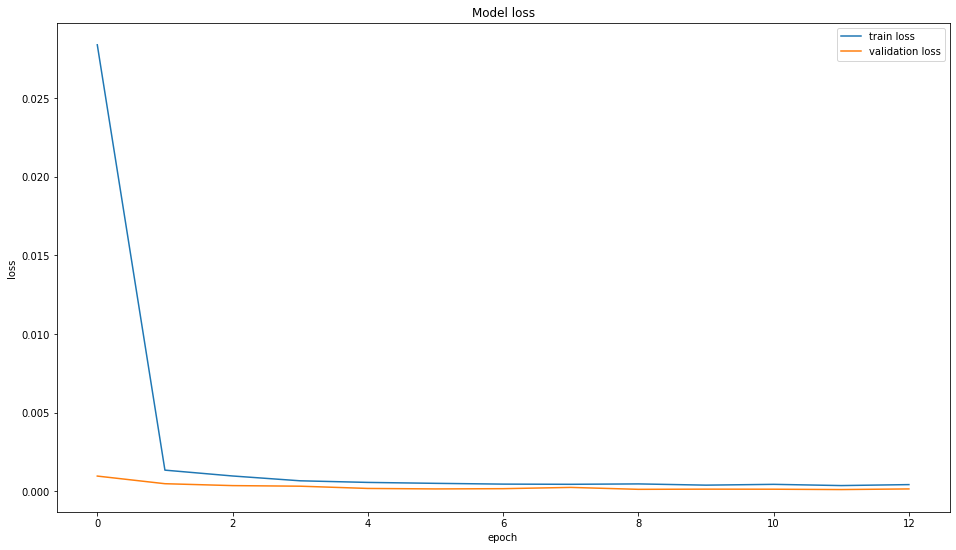

In [43]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show() 

In [44]:
#Create the testing data set
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60:]
#Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

#Convert the data to a numpy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [45]:
#Get the model's predicted price values for the x_test data set
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[83.6233  ],
       [83.5569  ],
       [83.491714],
       ...,
       [95.277954],
       [96.26521 ],
       [96.60379 ]], dtype=float32)

In [46]:
#Evaluate model (get the root mean quared error (RMSE))
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
mae = mean_absolute_error(predictions, y_test)

#Plot the data
train = prices[:training_data_len]
valid = prices[training_data_len:]
valid['Predictions'] = predictions

C:\Users\simon\AppData\Local\Temp/ipykernel_23748/1330665649.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



RMSE OF THE MODEL:  0.44572582650691905
MEAN ABSOLUTE ERROR OF THE MODEL:  1.3377112665920392


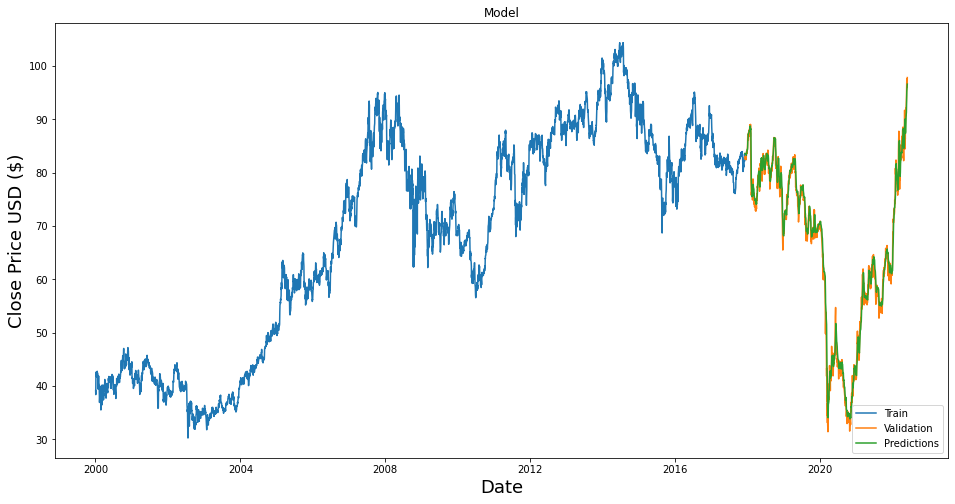

In [47]:
print("RMSE OF THE MODEL: ",rmse)
print("MEAN ABSOLUTE ERROR OF THE MODEL: ",mae)

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

## Predicting future
14 days period

In [48]:
X_FUTURE = 14
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
  curr_prediction = model.predict(np.array([last]))
  print(curr_prediction)
  last = np.concatenate([last[1:], curr_prediction])
  predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = scaler.inverse_transform([predictions])[0]
print(predictions)

[[0.89507204]]
[[0.8990984]]
[[0.90234315]]
[[0.9046584]]
[[0.9062949]]
[[0.90740216]]
[[0.90807086]]
[[0.9083679]]
[[0.90838695]]
[[0.9080802]]
[[0.9075165]]
[[0.90672386]]
[[0.9058238]]
[[0.9047911]]
[96.60378669 96.90217973 97.14264871 97.31422989 97.43551128 97.51757146
 97.56712915 97.58914056 97.59055409 97.56782267 97.52604384 97.46730259
 97.40060136 97.32406722]


In [49]:
import datetime
from datetime import timedelta
dicts = []
curr_date = prices.index[-1]
for i in range(X_FUTURE):
  curr_date = curr_date + timedelta(days=1)
  dicts.append({'Predictions':predictions[i], "Date": curr_date})

new_data = pd.DataFrame(dicts).set_index("Date")

In [50]:
start = dt.datetime(2022, 5, 1)
# end = dt.date.today()
end = dt.datetime(2022, 6, 15)

# data from Yahoo finanse
actual = data.DataReader(stock, 'yahoo', start, end)
actual.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2022-05-02  87.040001  84.629997  85.010002  86.410004  36335200.0  85.533859
2022-05-03  88.779999  86.120003  86.260002  88.190002  33908100.0  87.295807
2022-05-04  91.879997  88.910004  89.500000  91.699997  46188400.0  90.770210
2022-05-05  92.050003  88.389999  92.040001  90.309998  41013400.0  89.394310
2022-05-06  91.820000  89.349998  90.980003  91.690002  29619300.0  90.760323

In [51]:
actual['Predicted'] = new_data['Predictions']

In [52]:
compare = actual[['Close', 'Predicted']].dropna()
compare

Close  Predicted
Date                             
2022-06-02   97.669998  96.603787
2022-06-03   99.089996  96.902180
2022-06-06   98.839996  97.435511
2022-06-07  103.370003  97.517571
2022-06-08  104.589996  97.567129
2022-06-09  102.330002  97.589141
2022-06-10  100.459999  97.590554
2022-06-13   95.849998  97.467303
2022-06-14   96.099998  97.400601
2022-06-15   94.889999  97.324067

## Conclusions
Stock price on 2022-06-01 was 97.839996 USD per stock. 

Investor has ***5000 USD*** available to invest. In this case, investor is able to buy ***51*** stock and pay ***4989.83 USD***.

If investor had used our recomender and invested in stocks on 2022-06-01 and, of course, was `patient` and `lucky` enough, he would have earned ***344,25 USD***. It is ***6,89 %*** in a few days.